<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Plasma_Helicity_Velocty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

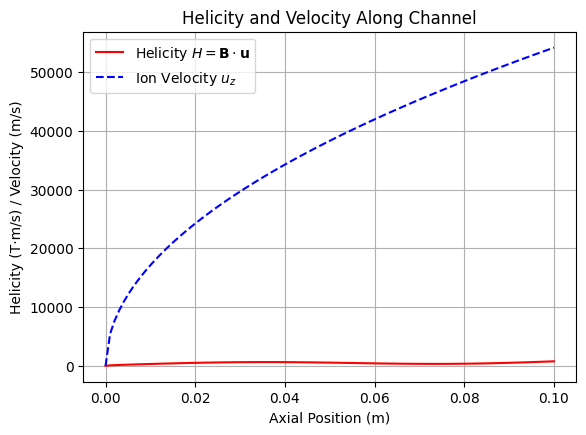

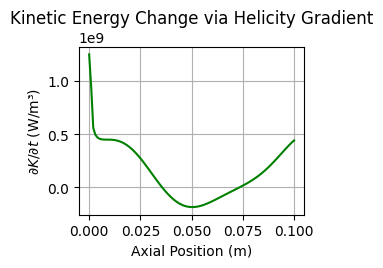

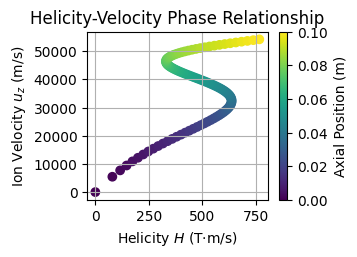

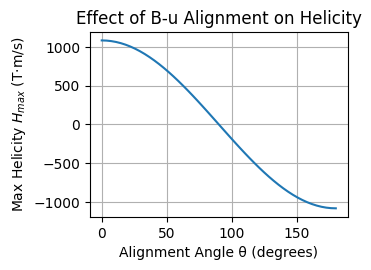

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 1.6e-19          # Elementary charge (C)
m_i = 2.18e-25       # Xenon ion mass (kg)
m_e = 9.1e-31        # Electron mass (kg)
mu0 = 4*np.pi*1e-7   # Permeability of free space

# Thruster Parameters
L = 0.1              # Channel length (m)
B_r = 0.02           # Radial magnetic field (T)
E_z = 2e4            # Axial electric field (V/m)
n = 1e18             # Plasma density (m^-3)
A = np.pi*(0.05)**2  # Channel cross-section (m^2)
T_e = 20             # Electron temperature (eV)

def calculate_helicity_effects():
    z = np.linspace(0, L, 100)

    # Magnetic field profile (radial, varying with z)
    B_r_profile = B_r * (1 + 0.5*np.sin(2*np.pi*z/L))  # Oscillatory B-field

    # Ion velocity (axial)
    u_z = np.sqrt(2 * e * E_z * z / m_i)  # Simplified acceleration

    # Helicity H = B · u (radial B and axial u are orthogonal here)
    # To model alignment, introduce a tilt angle θ between B and u
    theta = np.pi/4  # 45° alignment for demonstration
    H = B_r_profile * u_z * np.cos(theta)  # H = |B||u|cosθ

    # Power-helicity relation (from your paper)
    grad_H = np.gradient(H, z)
    dK_dt = (1/mu0) * B_r_profile * grad_H  # Simplified ∂K/∂t ≈ (B·∇)H

    return z, u_z, H, dK_dt

# Run simulation
z, u_z, H, dK_dt = calculate_helicity_effects()

# Plotting
plt.figure(figsize=(14, 10))

# Helicity vs. Velocity
plt.subplot(2, 2, 1)
plt.plot(z, H, 'r', label='Helicity $H = \mathbf{B} \cdot \mathbf{u}$')
plt.plot(z, u_z, 'b--', label='Ion Velocity $u_z$')
plt.xlabel('Axial Position (m)')
plt.ylabel('Helicity (T·m/s) / Velocity (m/s)')
plt.title('Helicity and Velocity Along Channel')
plt.legend()
plt.grid(True)
plt.show()

# Power-Helicity Coupling
plt.subplot(2, 2, 2)
plt.plot(z, dK_dt, 'g')
plt.xlabel('Axial Position (m)')
plt.ylabel('$\partial K / \partial t$ (W/m³)')
plt.title('Kinetic Energy Change via Helicity Gradient')
plt.grid(True)
plt.show()

# Helicity-Velocity Phase Space
plt.subplot(2, 2, 3)
plt.scatter(H, u_z, c=z, cmap='viridis')
plt.colorbar(label='Axial Position (m)')
plt.xlabel('Helicity $H$ (T·m/s)')
plt.ylabel('Ion Velocity $u_z$ (m/s)')
plt.title('Helicity-Velocity Phase Relationship')
plt.grid(True)
plt.show()

# Alignment Angle Effect
theta_range = np.linspace(0, np.pi, 50)
H_max = B_r * u_z[-1] * np.cos(theta_range)
plt.subplot(2, 2, 4)
plt.plot(np.degrees(theta_range), H_max)
plt.xlabel('Alignment Angle θ (degrees)')
plt.ylabel('Max Helicity $H_{max}$ (T·m/s)')
plt.title('Effect of B-u Alignment on Helicity')
plt.grid(True)

plt.tight_layout()
plt.show()